# Final Project 2023 - 11th Grade - Ofri Daniel

In [16]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Event 1 (Body Stoppage --> Good Termination) terminated at 22.817281728172816s --> the body has stopped moving


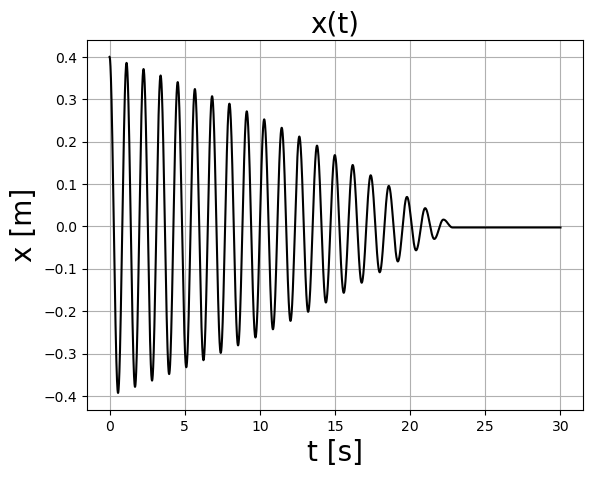

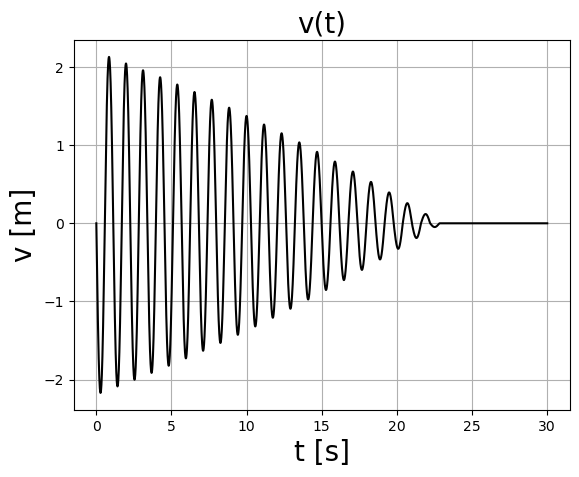

In [17]:
# Model With Friction


# Constants
k = 40  # Spring constant [N/m]
m = 1 # Mass of the object [kg]
l_0 = 0.1  # Rest length of the spring [m]
h = 0.3  # Height of spring from the surface of the body at x=0 [m]
mu = 0.1 # Kinetic friction coefficient
g = 9.81 # Gravitational acceleration on Earth's surface [m/s/s]

tmin = 0
tmax = 30
npoints = 10000

def model2(t, y): # y is an array of form [x, v], initially [x0, v0]
    x = y[0]
    v = y[1]
    dxdt = v
    #dvdt = (k/m) * (1 - l_0 / np.sqrt(h**2 + x**2)) * (mu * h * np.sign(v) - x) - mu * np.sign(v) * g
    dvdt = -(k/m) * x * (1 - l_0 / np.sqrt(h**2 + x**2)) - (mu / m) * np.sign(v) * (m*g - k*h * (1 - l_0 / np.sqrt(h**2 + x**2)))
    return [dxdt, dvdt]

# Initial conditions for x (or theta) and v
#theta0 = np.radians(35) # degrees * pi/180 = theta0 [rads]
x0 = 0.4 #np.tan(theta0) * h
v0 = 0


t_eval = np.linspace(tmin, tmax, npoints)

def event_1(t, y): # Defining termination event --> If the body has already reached stopping stage: stop solving the ODE (we can just set v = 0 from that point on)
    x, v = y
    return not (abs(v) <= 0.00001 and abs(k * x * (1 - l_0 / np.sqrt(h**2 + x**2))) < abs(mu * m * g - mu * k * h * (1 - l_0 / np.sqrt(h**2 + x**2))))

def event_2(t, y):
    x, v = y
    return not (k * h * (1 - l_0 / np.sqrt(h**2 + x**2)) > m * g)

event_1.terminal = True
event_2.terminal = True

# Solve ODEs for x(t) and v(t)
sol = solve_ivp(model2, (tmin, tmax), [x0, v0], t_eval=t_eval, method = "DOP853", events=[event_1, event_2]) # Numerical method for solving the ODEs is Runge-Kutta45
# Through the solution bunch object we extract the discrete t, x and v values
t = sol.t
x = sol.y[0]
v = sol.y[1]

if sol.message == 'A termination event occurred.':
    if sol.t_events[0].size > 0:
        print(f"Event 1 (Body Stoppage --> Good Termination) terminated at {t[-1]}s --> the body has stopped moving")
    if sol.t_events[1].size > 0:
        print(f"Event 2 (Body Lifting) terminated at {t[-1]}s, the body has moved vertically \n* Do not mind the graphs *")

if len(t) < npoints:
    x2 = np.concatenate([x, np.ones(npoints - len(t)) * x[-1]])
    v2 = np.concatenate([v, np.zeros(npoints - len(t))])
    t2 = t_eval

    # Plot x(t)
    plt.plot(t2, x2, color = "black")
    plt.xlabel('t [s]', fontsize = 20, color = "black")
    plt.ylabel('x [m]', fontsize = 20, color = "black")
    plt.title('x(t)', fontsize = 20, color = "black")
    plt.grid(True)
    plt.show()

    # Plot v(t)
    plt.plot(t2, v2, color = "black")
    plt.xlabel('t [s]', fontsize = 20, color = "black")
    plt.ylabel('v [m]', fontsize = 20, color = "black")
    plt.title('v(t)', fontsize = 20, color = "black")
    plt.grid(True)
    plt.show()



else:
    # Plot x(t)
    plt.plot(t, x, color = "black")
    plt.xlabel('t [s]', fontsize = 20, color = "black")
    plt.ylabel('x [m]', fontsize = 20, color = "black")
    plt.title('x(t)', fontsize = 20, color = "black")
    plt.grid(True)
    plt.show()
    

    # Plot v(t)
    plt.plot(t, v, color = "black")
    plt.xlabel('t [s]', fontsize = 20, color = "black")
    plt.ylabel('v [m]', fontsize = 20, color = "black")
    plt.title('v(t)', fontsize = 20, color = "black")
    plt.grid(True)
    plt.show()




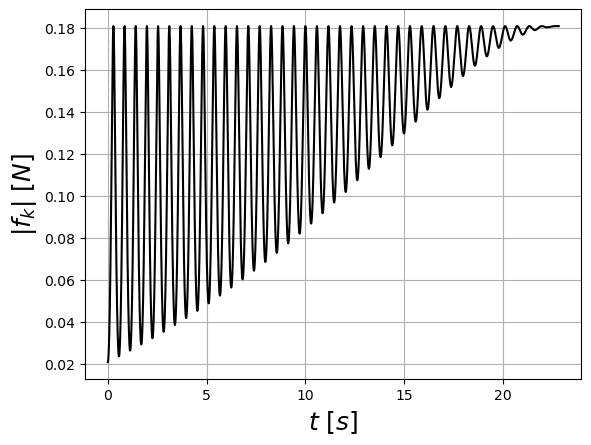

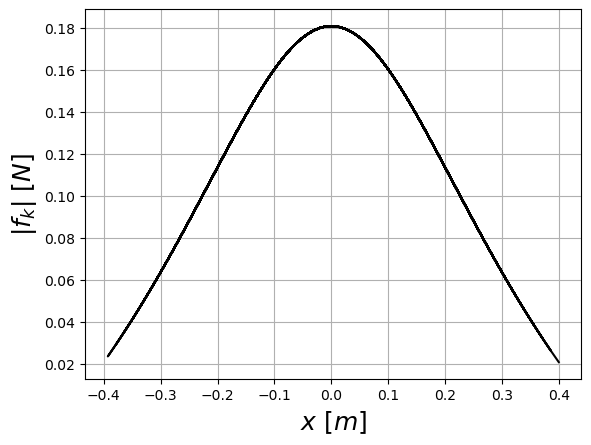

In [18]:
plt.plot(t, mu*(m*g - k*h * (1 - l_0 / np.sqrt(h**2 + x**2))), color="black")
plt.xlabel(r"$t \ [s]$", color="black", fontsize=18)
plt.ylabel(r"$|f_k| \ [N]$", color="black", fontsize=18)
plt.grid()
plt.show()

plt.plot(x, mu*(m*g - k*h * (1 - l_0 / np.sqrt(h**2 + x**2))), color="black")
plt.xlabel(r"$x \ [m]$", color="black", fontsize=18)
plt.ylabel(r"$|f_k| \ [N]$", color="black", fontsize=18)
plt.grid()
plt.show()

In [19]:
# Function of the model - has inital condition dependency - extract only the time of stoppage
# This function is used to extract data on correlation between stoppage time and initial conditions

def model(x0=0.3, mu=0.02, l_0 = 0.3, h=0.3, m = 1, k=30, method="DOP853", rtol=None):

    # Constants
    k = k  # Spring constant [N/m]
    m = m # Mass of the object [kg]
    l_0 = l_0  # Rest length of the spring [m]
    h = h  # Height of spring from the surface of the body at x=0 [m]
    mu = mu # Kinetic friction coefficient
    g = 9.81 # Gravitational acceleration on Earth's surface [m/s/s]

    tmin = 0
    tmax = 100000 # Should never reach this state

    def model2(t, y): # y is an array of form [x, v], initially [x0, v0]
        x = y[0]
        v = y[1]
        dxdt = v
        #dvdt = (k/m) * (1 - l_0 / np.sqrt(h**2 + x**2)) * (mu * h * np.sign(v) - x) - mu * np.sign(v) * g
        dvdt = -(k/m) * x * (1 - l_0 / np.sqrt(h**2 + x**2)) - (mu / m) * np.sign(v) * (m*g - k*h * (1 - l_0 / np.sqrt(h**2 + x**2)))
        return [dxdt, dvdt]

    # Initial conditions for x (or theta) and v
    #theta0 = np.radians(35) # degrees * pi/180 = theta0 [rads]
    x0 = x0
    v0 = 0



    def event_1(t, y): # Defining termination event --> If the body has already reached stopping stage: stop solving the ODE (we can just set v = 0 from that point on)
        x, v = y
        return not (abs(v) <= 0.0001 and abs(k * x * (1 - l_0 / np.sqrt(h**2 + x**2))) <= abs(mu * m * g - mu * k * h * (1 - l_0 / np.sqrt(h**2 + x**2))))

    def event_2(t, y):
        x, v = y
        #if (k * h * (1 - l_0 / np.sqrt(h**2 + x**2)) > m * g):
            #print("lifted")
        return not (k * h * (1 - l_0 / np.sqrt(h**2 + x**2)) > m * g)

    event_1.terminal = True
    event_2.terminal = True



    # Solve ODEs for x(t) and v(t)
    if rtol == None:
        sol = solve_ivp(model2, (tmin, tmax), [x0, v0], method = method, events=[event_1, event_2])
    else:
        sol = solve_ivp(model2, (tmin, tmax), [x0, v0], method = method, events=[event_1, event_2], rtol=rtol)

    if sol.t_events[1].size > 0:
        return None


    return sol.t[-1]







[0.991099123566784, 0.9737577446345242, 0.999470453853809]


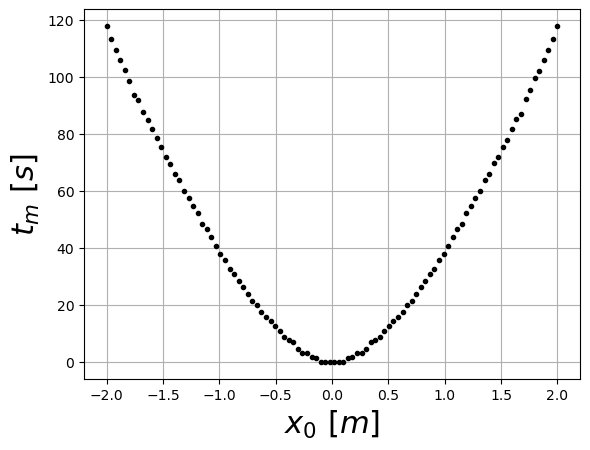

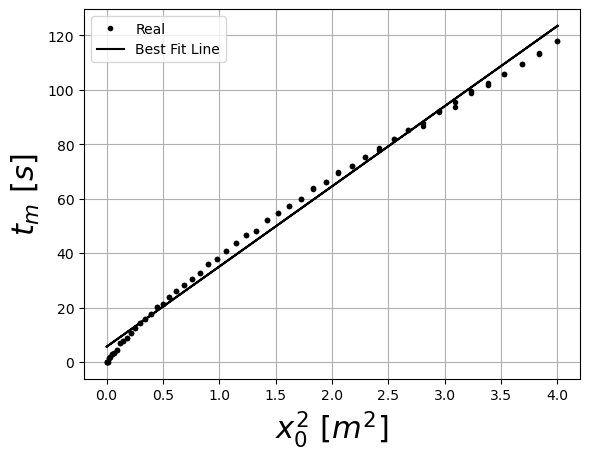

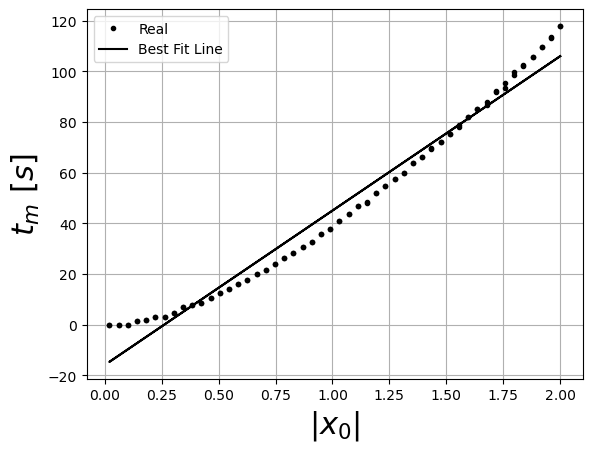

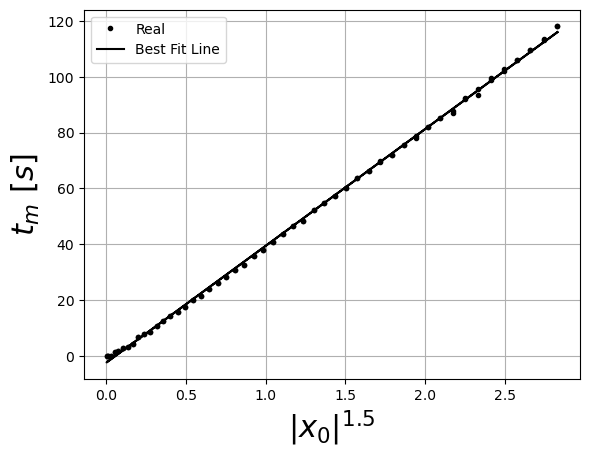

In [22]:
# For different t_m(x_0)

x_0_arr = np.linspace(-2, 2, 100)
tm_arr1 = [model(x0=x_0, h=0.3, l_0=0.3) for x_0 in x_0_arr]

# R^2 calculation
x_0_corr_arrs = [x_0_arr**2, abs(x_0_arr), abs(x_0_arr)**1.5]
coeffs_arr = [np.polyfit(x_0_corr, tm_arr1, 1) for x_0_corr in x_0_corr_arrs]
R2_arr = []
for i in range(len(x_0_corr_arrs)):
    p = np.poly1d(coeffs_arr[i])
    # fit values, and mean
    yhat = p(x_0_corr_arrs[i])
    ybar = np.sum(tm_arr1)/len(tm_arr1)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((tm_arr1 - ybar)**2)
    R2_arr.append(ssreg/sstot)
print(R2_arr)

plt.plot(x_0_arr, tm_arr1, '.', color="black")
plt.grid()
plt.xlabel(r"$x_0 \ [m]$", fontsize = 22, color="black")
plt.ylabel(r"$t_m \ [s]$", fontsize = 22, color="black")
plt.show()

plt.plot(x_0_arr**2, tm_arr1, '.', label="Real", color="black")
plt.grid()
plt.xlabel(r"$x_0^2 \ [m^2]$", fontsize = 22, color="black")
plt.ylabel(r"$t_m \ [s]$", fontsize = 22, color="black")
plt.plot(x_0_arr**2, coeffs_arr[0].dot(np.array([x_0_arr**2, 1], dtype=object)), label="Best Fit Line", color="black")
plt.legend()
plt.show()

plt.plot(abs(x_0_arr), tm_arr1, '.', label="Real", color="black")
plt.grid()
plt.xlabel(r"$|x_0|$", fontsize = 22, color="black")
plt.ylabel(r"$t_m \ [s]$", fontsize = 22, color="black")
plt.plot(abs(x_0_arr), coeffs_arr[1].dot(np.array([abs(x_0_arr), 1], dtype=object)), label="Best Fit Line", color="black")
plt.legend()
plt.show()

plt.plot(abs(x_0_arr)**1.5, tm_arr1, '.', label="Real", color="black")
plt.grid()
plt.xlabel(r"$|x_0|^{1.5}$", fontsize = 22, color="black")
plt.ylabel(r"$t_m \ [s]$", fontsize = 22, color="black")
plt.plot(abs(x_0_arr)**1.5, coeffs_arr[2].dot(np.array([abs(x_0_arr)**1.5, 1], dtype=object)), label="Best Fit Line", color="black")
plt.legend()
plt.show()

In [15]:
# For t_m(mu)

mu_arr = np.linspace(0.001, 0.3, 300)
tm_arr2 = [model(mu=mu) for mu in mu_arr]



plt.plot(mu_arr, tm_arr2, color="black")
plt.grid()
plt.xlabel("mu", fontsize = 22, color="black")
plt.ylabel(r"$t_m \ [s]$", fontsize = 22, color="black")
plt.show()

coeffs = np.polyfit(1/mu_arr, tm_arr2, 1)

p = np.poly1d(coeffs)
yhat = p(1 / mu_arr)
ybar = np.sum(tm_arr2) / len(tm_arr2)
ssreg = np.sum((yhat - ybar)**2)
sstot = np.sum((tm_arr2 - ybar)**2)
print(ssreg / sstot)

plt.plot(1/mu_arr, tm_arr2, '.', color="black")
plt.grid()
plt.xlabel("1/mu", fontsize = 22, color="black")
plt.ylabel(r"$t_m \ [s]$", fontsize = 22, color="black")
plt.plot(1/mu_arr, coeffs.dot(np.array([1/mu_arr, 1], dtype=object)), color="black")
plt.show()



NameError: name 'model' is not defined

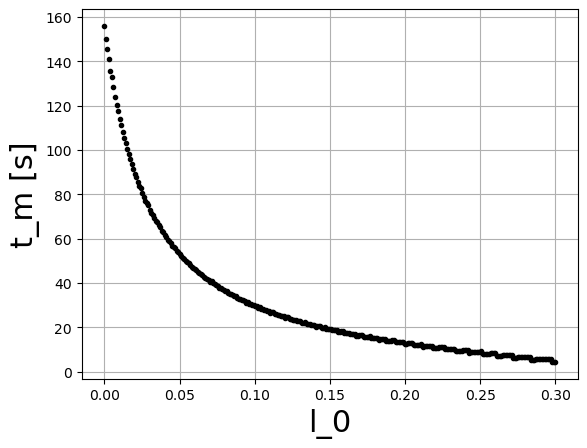

In [87]:
# For t_m(l_0)

l_0_arr = np.linspace(0, 0.3, 300)
tm_arr3 = [model(l_0=l_0) for l_0 in l_0_arr]

plt.plot(l_0_arr, tm_arr3, '.', color="black")
plt.grid()
plt.xlabel("l_0", fontsize = 22, color="black")
plt.ylabel("t_m [s]", fontsize = 22, color="black")
plt.show()

C:\Users\97254\AppData\Local\Temp\ipykernel_5796\59375860.py:3: RuntimeWarning: divide by zero encountered in power
  return tm_arr3[0]*a**(-b*x**c)
C:\Users\97254\AppData\Local\Temp\ipykernel_5796\59375860.py:3: RuntimeWarning: invalid value encountered in power
  return tm_arr3[0]*a**(-b*x**c)


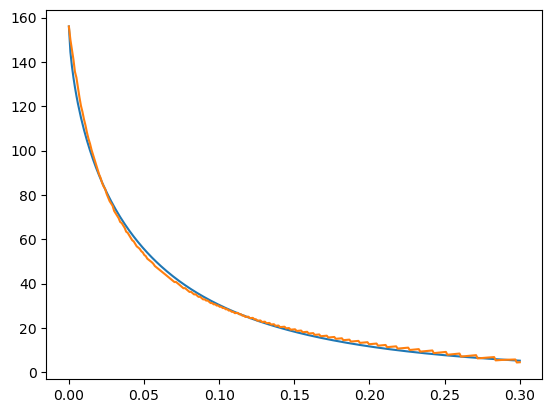

0.9968415104955012
[4.95466583 4.72773236 0.66488384]


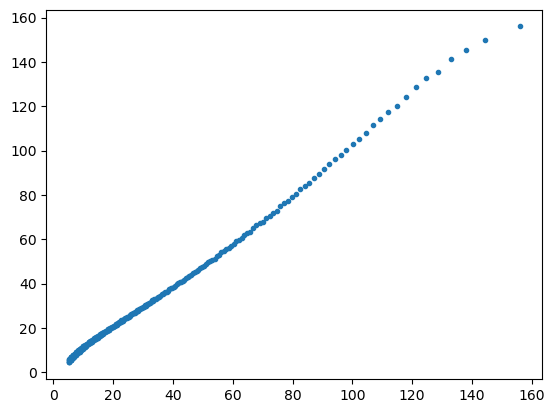

In [101]:
from scipy.optimize import curve_fit
def f1(x, a,b,c):
    return tm_arr3[0]*a**(-b*x**c)

popt, pcov = curve_fit(f1, l_0_arr, tm_arr3)
plt.plot(l_0_arr, f1(l_0_arr, *popt))
plt.plot(l_0_arr, tm_arr3)
plt.show()
plt.plot(f1(l_0_arr, *popt), tm_arr3, '.')

coeffs = np.polyfit(f1(l_0_arr, *popt), tm_arr3, 1)

p = np.poly1d(coeffs)
yhat = p(f1(l_0_arr, *popt))
ybar = np.sum(tm_arr3) / len(tm_arr3)
ssreg = np.sum((yhat - ybar)**2)
sstot = np.sum((tm_arr3 - ybar)**2)
print(ssreg / sstot)

print(popt)


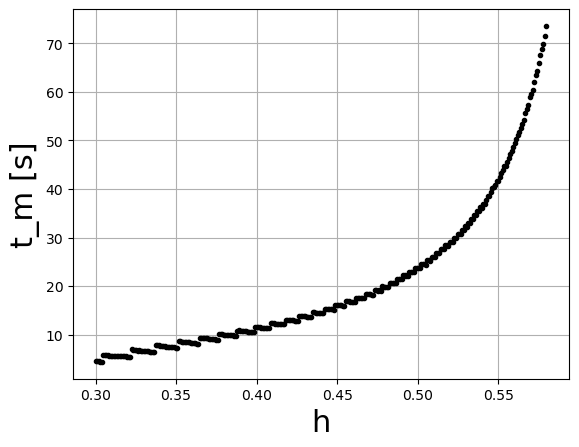

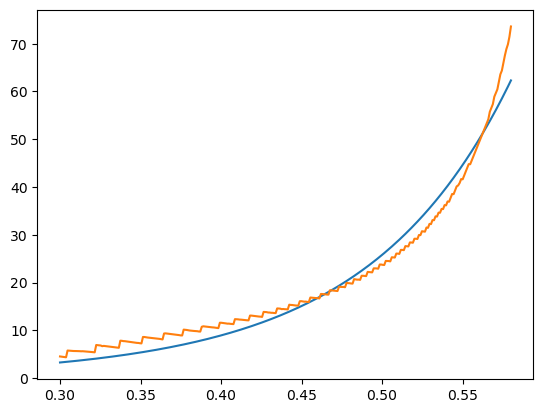

0.9764586602181935
[277.93615141   1.83986504   1.21682625]


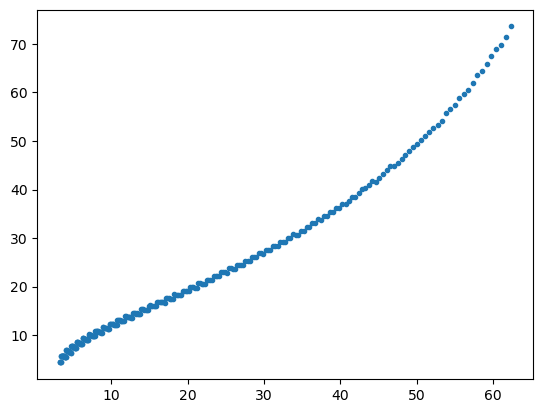

In [106]:
# For t_m(h)

h_arr = np.linspace(0.3, 0.58, 300)
tm_arr4 = [model(h=h, method="RK45") for h in h_arr]

plt.plot(h_arr, tm_arr4, '.', color="black")
plt.grid()
plt.xlabel("h", fontsize = 22, color="black")
plt.ylabel("t_m [s]", fontsize = 22, color="black")
plt.show()

def f2(x, a,b,c):
    return h_arr[0]*a**(b*x**c)

popt, pcov = curve_fit(f2, h_arr, tm_arr4)
plt.plot(h_arr, f2(h_arr, *popt))
plt.plot(h_arr, tm_arr4)
plt.show()
plt.plot(f2(h_arr, *popt), tm_arr4, '.')

coeffs = np.polyfit(f2(h_arr, *popt), tm_arr4, 1)

p = np.poly1d(coeffs)
yhat = p(f2(h_arr, *popt))
ybar = np.sum(tm_arr4) / len(tm_arr4)
ssreg = np.sum((yhat - ybar)**2)
sstot = np.sum((tm_arr4 - ybar)**2)
print(ssreg / sstot)

print(popt)

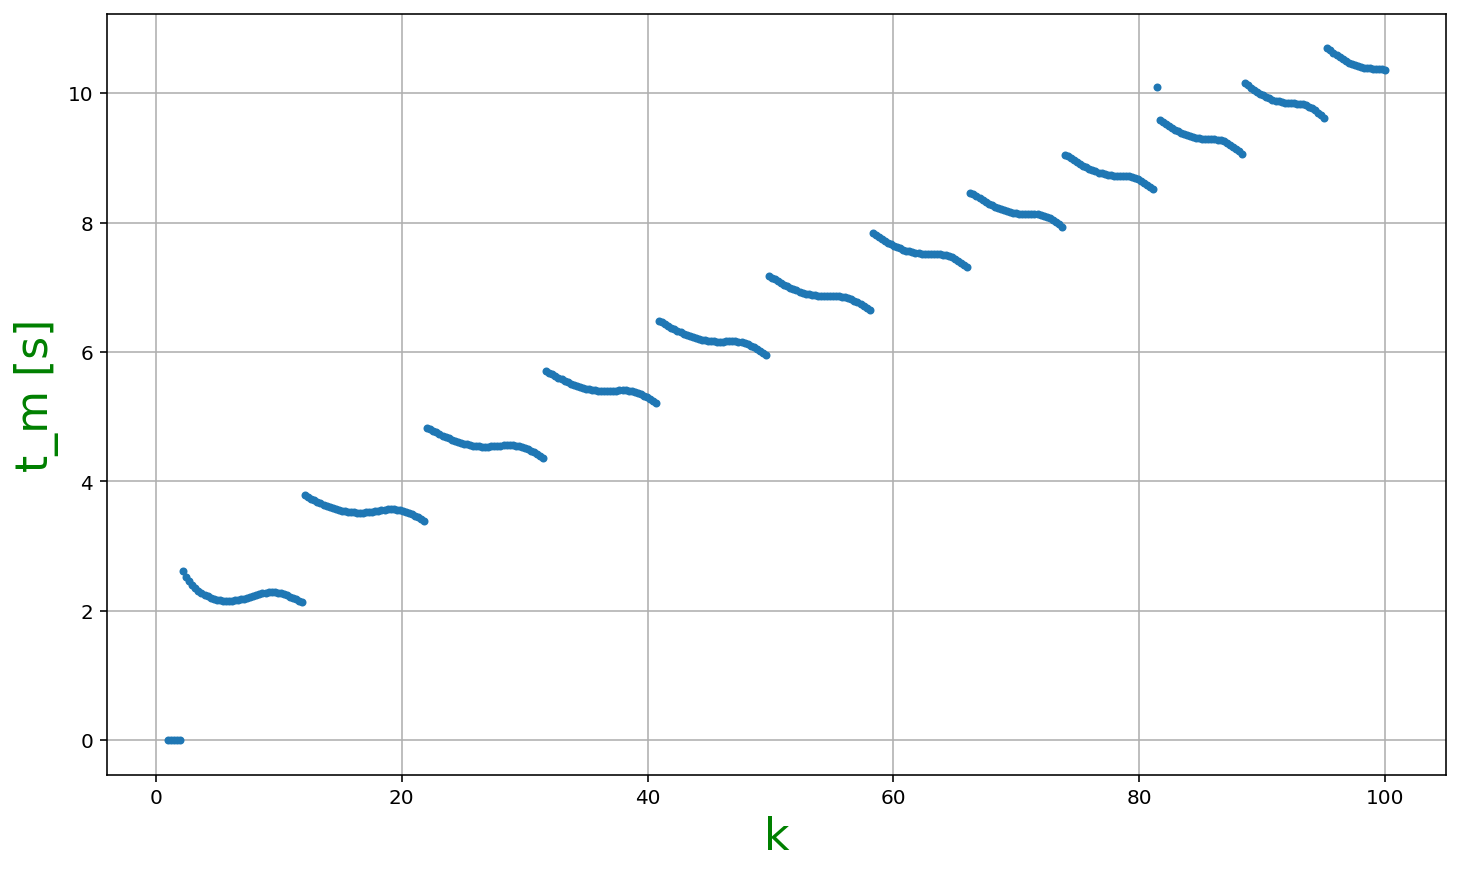

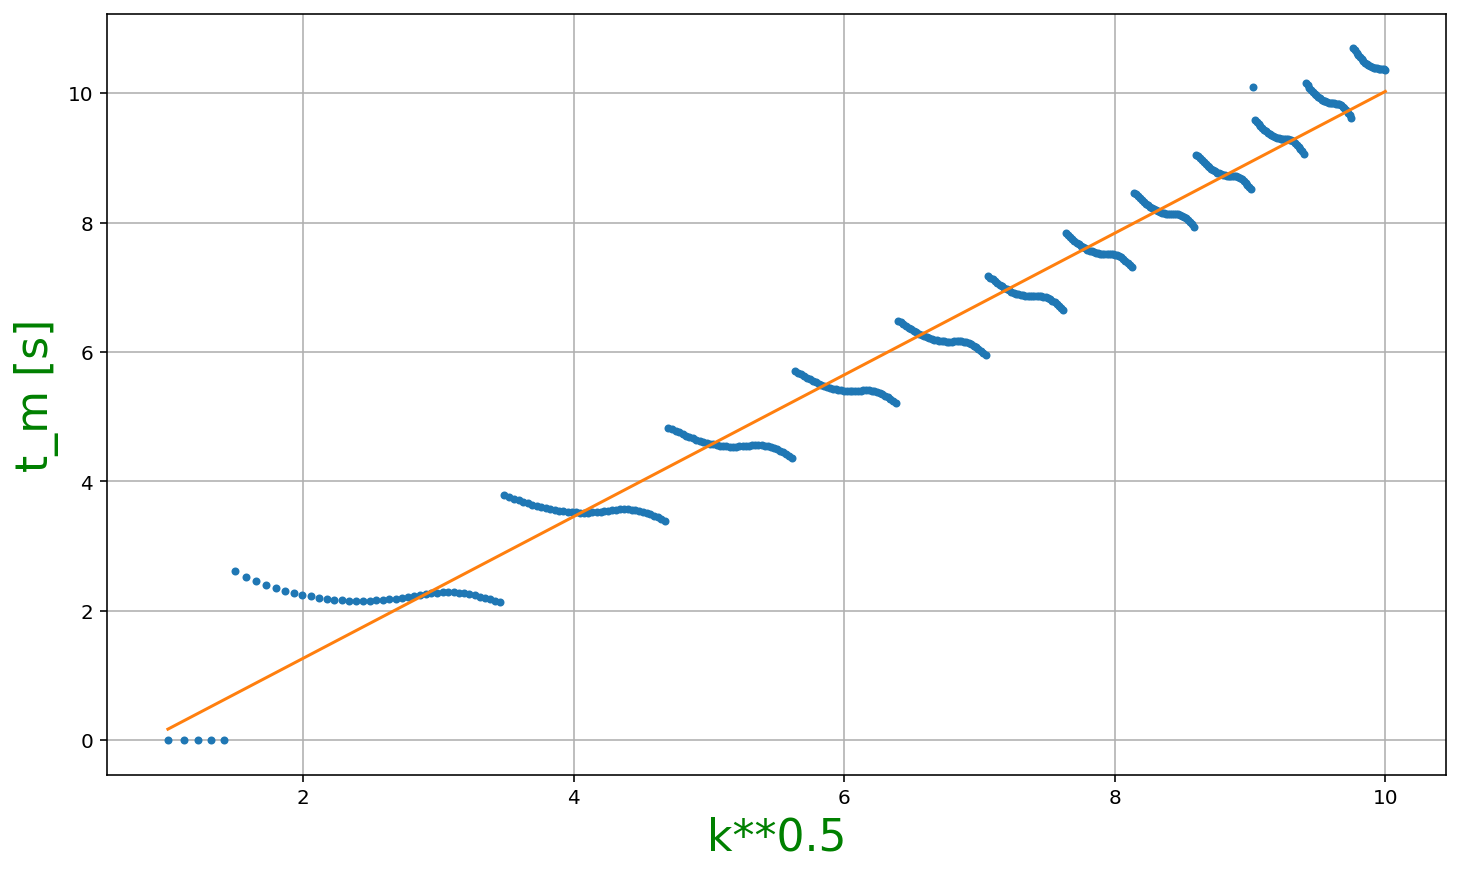

In [13]:
# For t_m(k)
k_arr = np.linspace(1, 100, 400)
tm_arr5 = [model(k=k) for k in k_arr]

plt.plot(k_arr, tm_arr5, '.', color="black")
plt.grid()
plt.xlabel("k", fontsize = 22, color="black")
plt.ylabel("t_m [s]", fontsize = 22, color="black")
plt.show()

plt.plot(np.sqrt(k_arr), tm_arr5, '.', color="black")
plt.grid()
plt.xlabel("k**0.5", fontsize = 22, color="black")
plt.ylabel("t_m [s]", fontsize = 22, color="black")
plt.plot(np.sqrt(k_arr), np.polyfit(np.sqrt(k_arr), tm_arr5, 1).dot(np.array([np.sqrt(k_arr), 1], dtype=object)), color="black")
plt.show()

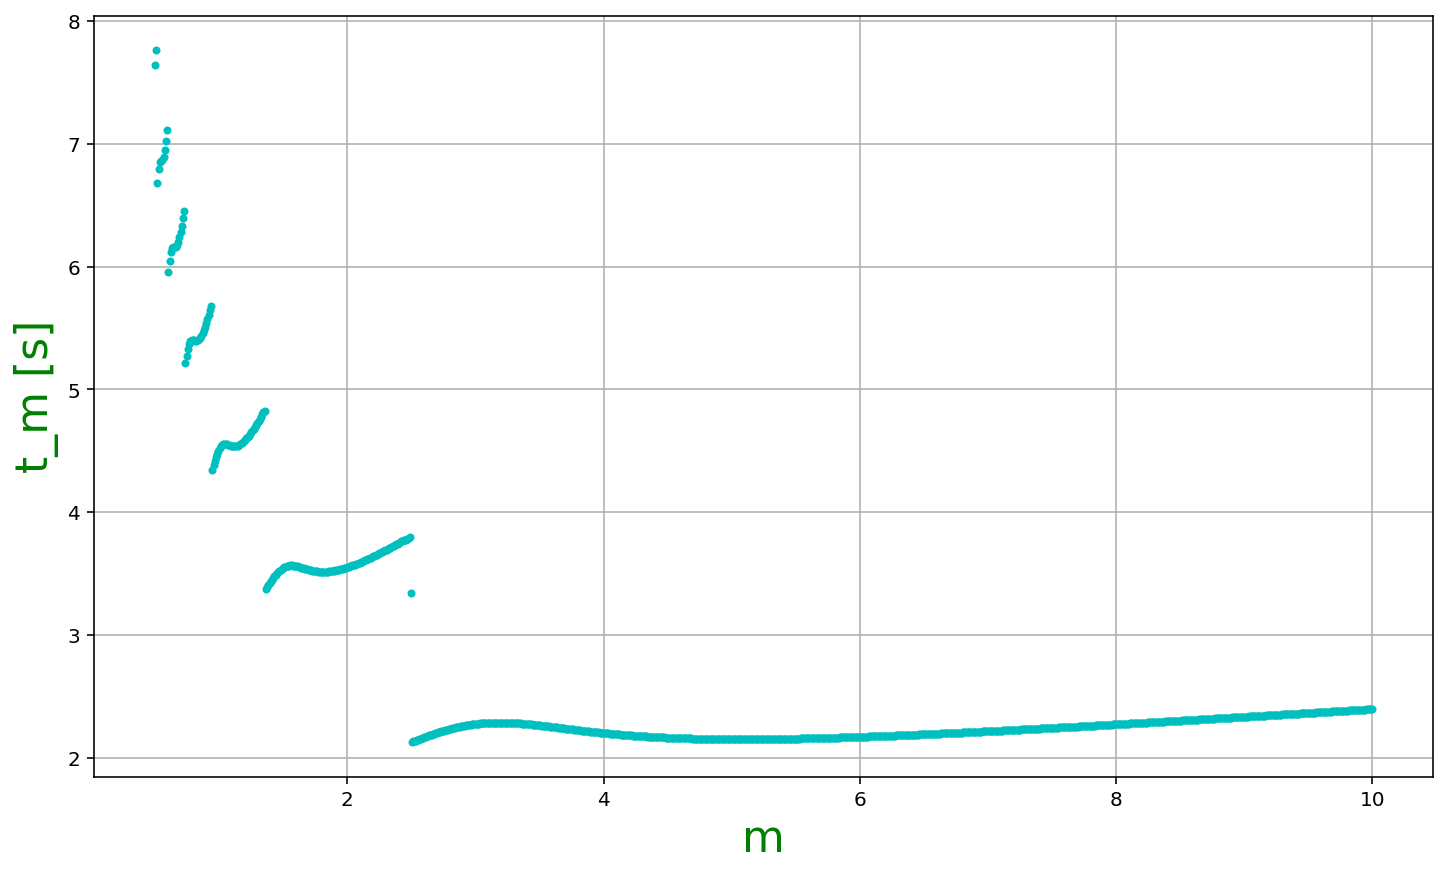

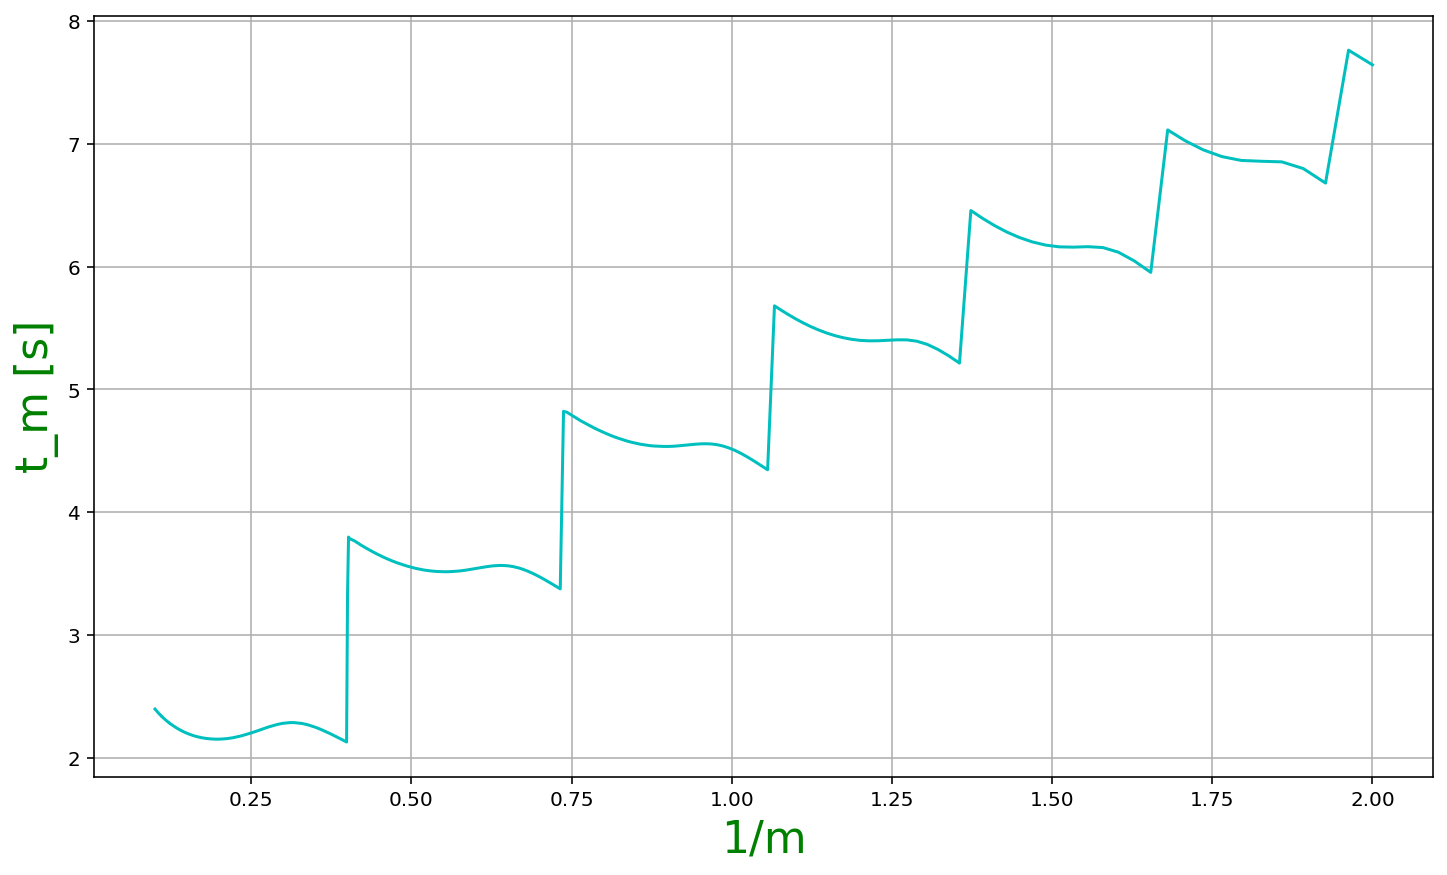

In [30]:
# For t_m(m)
m_arr = np.linspace(0.5, 10, 1000)
tm_arr5 = [model(m=m) for m in m_arr]

plt.plot(m_arr, tm_arr5, '.', color="black")
plt.grid()
plt.xlabel("m", fontsize = 22, color="black")
plt.ylabel("t_m [s]", fontsize = 22, color="black")
plt.show()

plt.plot(1/m_arr, tm_arr5, 'c')
plt.grid()
plt.xlabel("1/m", fontsize = 22, color="black")
plt.ylabel("t_m [s]", fontsize = 22, color="black")
plt.show()

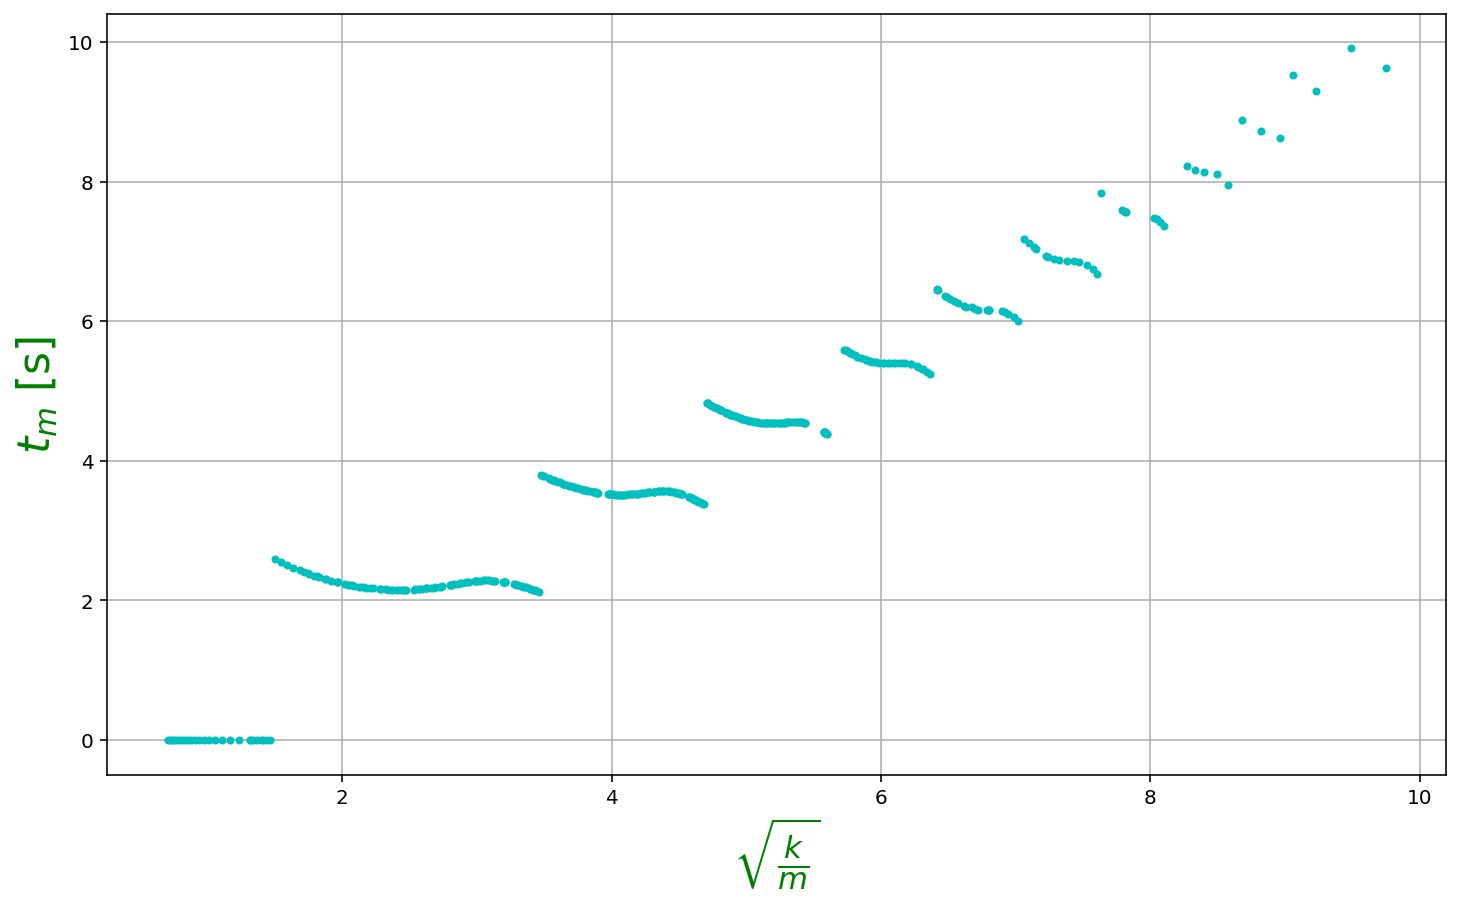

In [75]:
m_arr2 = np.linspace(1, 4, 20)
k_arr2 = np.linspace(2, 95 , 20)

tm_arr6 = [model(m=m, k=k) for m in m_arr2 for k in k_arr2]
corr1 = [np.sqrt(k/m) for m in m_arr2 for k in k_arr2]

plt.plot(corr1, tm_arr6, 'c.')
plt.grid()
plt.xlabel(r"$\sqrt{\frac{k}{m}}$", fontsize = 22, color="green")
plt.ylabel(r"$t_m$ [s]", fontsize = 22, color="green")
plt.show()

In [67]:
mu_arr = np.linspace(0.001, 0.3, 30)
A_0_arr = np.linspace(-1, 1, 30)
tm_arrs = [[model(x0=A_0, mu=mu) for A_0 in A_0_arr] for mu in mu_arr]
coeff_arrs = [[abs(A_0)**1.5/mu for A_0 in A_0_arr] for mu in mu_arr]

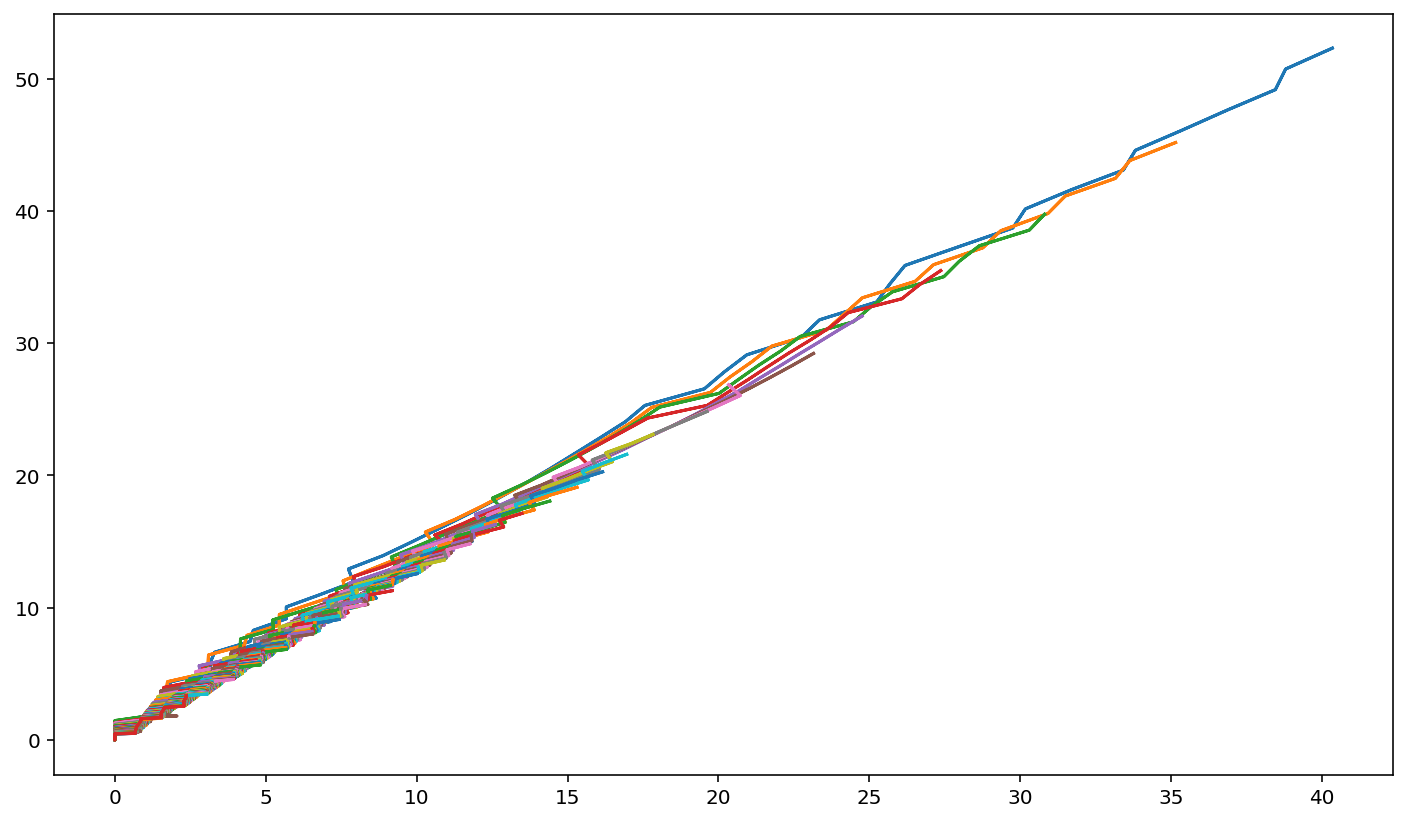

In [68]:
lst = []
for i in range(6,len(tm_arrs)):
    plt.plot(tm_arrs[i], coeff_arrs[i])
    lst.append(np.polyfit(tm_arrs[i], coeff_arrs[i], 1)[0])

1.2374442882216388

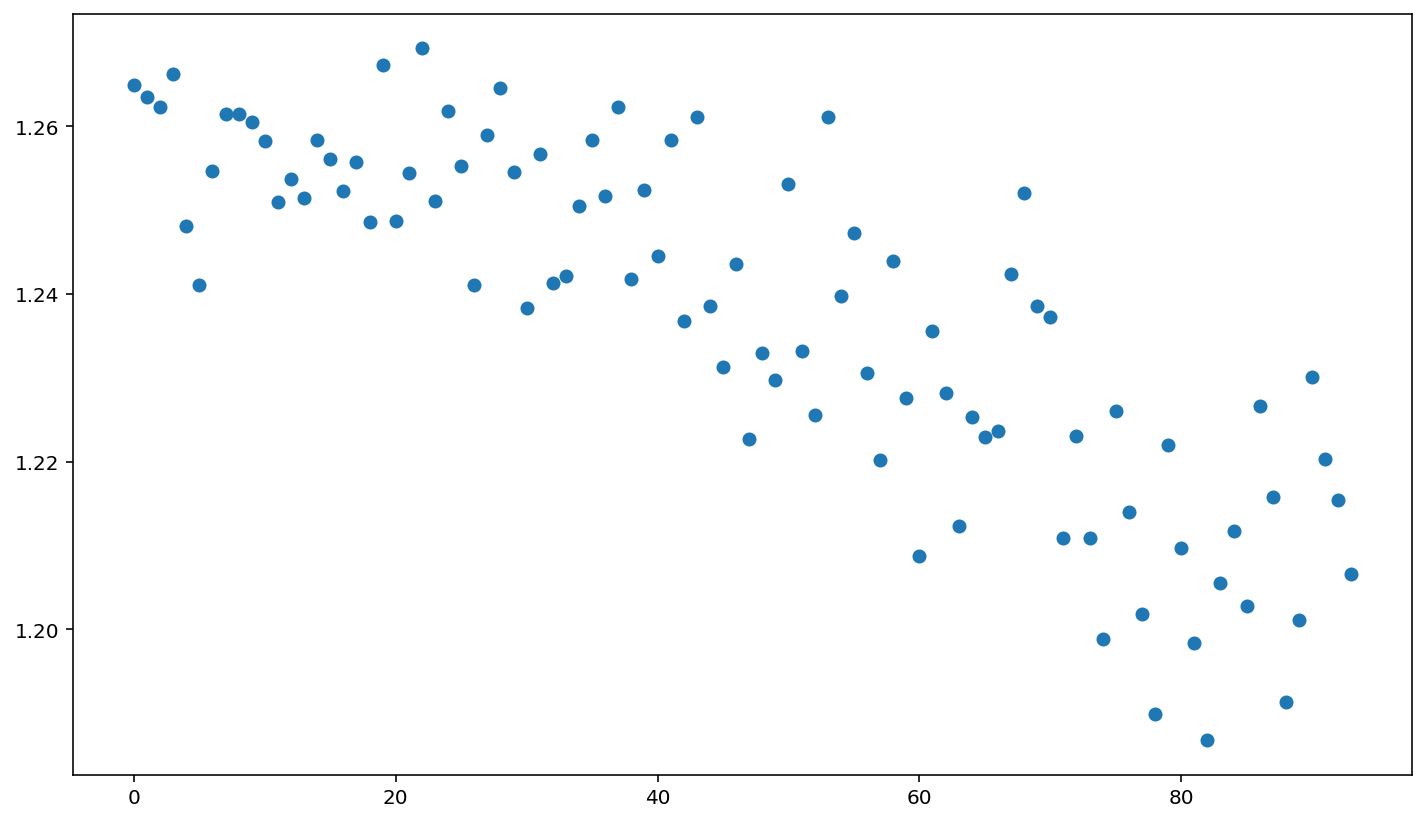

In [69]:
plt.scatter(*zip(*enumerate(lst)))
np.mean(lst)